# **Sử dụng Neural Network để xây dựng mô hình phân lớp trên bộ dữ liệu MNIST từ thư viện Keras (k-fold cross validation)**

**a) Đọc bộ dữ liệu train, test của MNIST từ Keras**

In [15]:
from keras.datasets import mnist

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("Huỳnh Thị Trúc Lam - 6351071040")
print("MNIST dataset loaded successfully.")

Huỳnh Thị Trúc Lam - 6351071040
MNIST dataset loaded successfully.


**b) In ra kích thước của tập train, test**



In [ ]:
print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of x_test: {x_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)
Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)


**c) Chuẩn hóa các giá trị pixel của ảnh về đoạn [0,1]**

In [ ]:
# Normalize pixel values to the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

print("Pixel values normalized to [0, 1].")

Pixel values normalized to [0, 1].


**d) Định nghĩa hàm create_model, bao gồm:**
- Model là Neural Network tương tự như câu 2
- Biên dịch mô hình sử dụng optimizer: adam; loss:
sparse_categorical_crossentropy; metric: accuracy

In [14]:
from keras.models import Sequential
from keras.layers import Dense, Flatten

def create_model():
    model = Sequential([
        Input(shape=(28, 28)),         # Input layer tách riêng
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.2),
        Dense(num_classes, activation='softmax')
    ])

    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

print("Huỳnh Thị Trúc Lam - 6351071040")
print("The 'create_model' function has been defined.")

Huỳnh Thị Trúc Lam - 6351071040
The 'create_model' function has been defined.


**e) Huấn luyện mô hình bằng k-fold cross validation (với k=10).**

In [13]:
from sklearn.model_selection import KFold

# Initialize KFold cross-validator
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Lists to store results
models = []
accuracy_per_fold = []
loss_per_fold = []

print("Starting K-Fold Cross Validation...")

# Iterate over each fold
for fold, (train_index, val_index) in enumerate(kf.split(x_train, y_train)):
    print(f"\n--- Fold {fold+1}/10 ---")

    # Prepare data for the current fold
    x_train_fold, x_val_fold = x_train[train_index], x_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Create a new model instance for each fold
    model = create_model()

    # Train the model
    # Setting verbose to 0 to suppress detailed output for each epoch
    print("Training model for current fold...")
    model.fit(x_train_fold, y_train_fold, epochs=5, batch_size=32, verbose=0)

    # Evaluate the model
    print("Evaluating model for current fold...")
    loss, accuracy = model.evaluate(x_val_fold, y_val_fold, verbose=0)

    # Store results
    accuracy_per_fold.append(accuracy)
    loss_per_fold.append(loss)
    models.append(model)

    # Print results for the current fold
    print(f"Fold {fold+1} - Validation Loss: {loss:.4f}, Validation Accuracy: {accuracy:.4f}")

print("\nK-Fold Cross Validation Complete.")
print("Huỳnh Thị Trúc Lam - 6351071040")

Starting K-Fold Cross Validation...

--- Fold 1/10 ---
Training model for current fold...
Evaluating model for current fold...
Fold 1 - Validation Loss: 0.0777, Validation Accuracy: 0.9757

--- Fold 2/10 ---
Training model for current fold...
Evaluating model for current fold...
Fold 2 - Validation Loss: 0.0851, Validation Accuracy: 0.9740

--- Fold 3/10 ---
Training model for current fold...
Evaluating model for current fold...
Fold 3 - Validation Loss: 0.0906, Validation Accuracy: 0.9747

--- Fold 4/10 ---
Training model for current fold...
Evaluating model for current fold...
Fold 4 - Validation Loss: 0.0856, Validation Accuracy: 0.9773

--- Fold 5/10 ---
Training model for current fold...
Evaluating model for current fold...
Fold 5 - Validation Loss: 0.0926, Validation Accuracy: 0.9740

--- Fold 6/10 ---
Training model for current fold...
Evaluating model for current fold...
Fold 6 - Validation Loss: 0.0875, Validation Accuracy: 0.9747

--- Fold 7/10 ---
Training model for current 

**f) Tính và in ra Mean Accuracy, Standard deviation accuracy (độ lệch chuẩn của Accuracy), Mean Loss, Standard deviation loss của mô hình trong quá trình huấn luyện**

In [16]:
import numpy as np

# Calculate and print mean and standard deviation of accuracy
mean_accuracy = np.mean(accuracy_per_fold)
std_accuracy = np.std(accuracy_per_fold)
print(f"Average validation accuracy: {mean_accuracy:.4f}")
print(f"Standard deviation of validation accuracy: {std_accuracy:.4f}")

# Calculate and print mean and standard deviation of loss
mean_loss = np.mean(loss_per_fold)
std_loss = np.std(loss_per_fold)
print(f"Average validation loss: {mean_loss:.4f}")
print(f"Standard deviation of validation loss: {std_loss:.4f}")

print("Huỳnh Thị Trúc Lam - 6351071040")

Average validation accuracy: 0.9743
Standard deviation of validation accuracy: 0.0018
Average validation loss: 0.0870
Standard deviation of validation loss: 0.0053
Huỳnh Thị Trúc Lam - 6351071040


**g) Vẽ biểu đồ thể hiện accuracy, loss sau mỗi fold.**

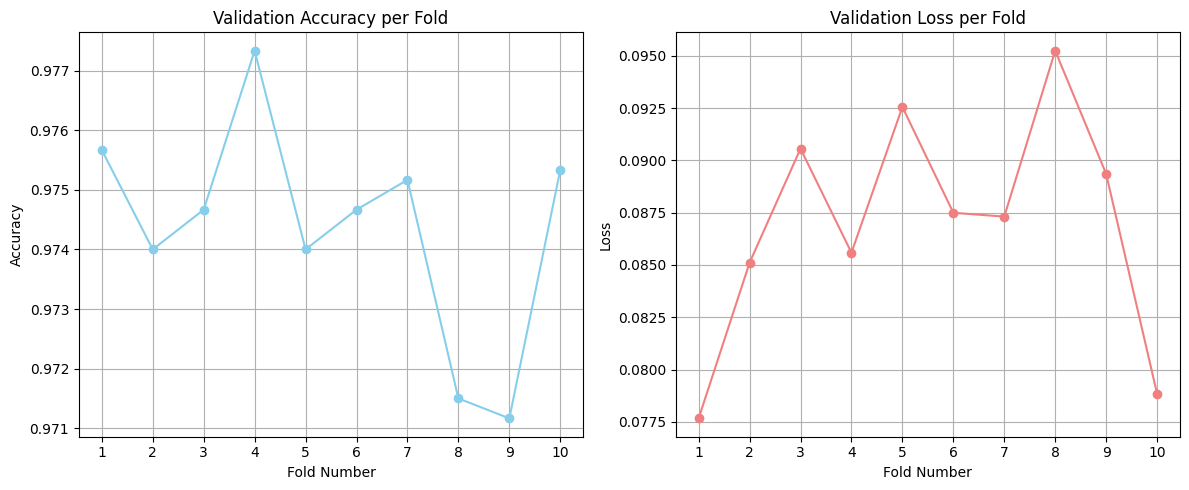

Huỳnh Thị Trúc Lam - 6351071040


In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Create a list of fold numbers for the x-axis
folds = range(1, len(accuracy_per_fold) + 1)

# Create the plots
plt.figure(figsize=(12, 5))

# Plot Validation Accuracy per Fold
plt.subplot(1, 2, 1) # 1 row, 2 columns, first plot
plt.plot(folds, accuracy_per_fold, marker='o', linestyle='-', color='skyblue')
plt.title('Validation Accuracy per Fold')
plt.xlabel('Fold Number')
plt.ylabel('Accuracy')
plt.xticks(folds) # Ensure all fold numbers are shown on x-axis
plt.grid(True)

# Plot Validation Loss per Fold
plt.subplot(1, 2, 2) # 1 row, 2 columns, second plot
plt.plot(folds, loss_per_fold, marker='o', linestyle='-', color='lightcoral')
plt.title('Validation Loss per Fold')
plt.xlabel('Fold Number')
plt.ylabel('Loss')
plt.xticks(folds) # Ensure all fold numbers are shown on x-axis
plt.grid(True)

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show()

print("Huỳnh Thị Trúc Lam - 6351071040")

**h) Sử dụng mô hình có Accuracy tốt nhất giữa các fold trong quá trình huấn luyện và phân lớp cho tập test.**

In [18]:
import numpy as np

# Find the index of the model with the highest validation accuracy
best_model_index = np.argmax(accuracy_per_fold)
best_model = models[best_model_index]

print(f"Selected model from fold {best_model_index + 1} with highest accuracy: {accuracy_per_fold[best_model_index]:.4f}")

# Evaluate the best model on the test set
print("Evaluating the best model on the test set...")
test_loss, test_accuracy = best_model.evaluate(x_test, y_test, verbose=0)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

print("Huỳnh Thị Trúc Lam - 6351071040")

Selected model from fold 4 with highest accuracy: 0.9773
Evaluating the best model on the test set...
Test Loss: 14.9172
Test Accuracy: 0.9742
Huỳnh Thị Trúc Lam - 6351071040


**i) Tính và in ra Accuracy của mô hình trên tập test**

In [19]:
print(f"Accuracy of the model on the test set: {test_accuracy:.4f}")
print("Huỳnh Thị Trúc Lam - 6351071040")

Accuracy of the model on the test set: 0.9742
Huỳnh Thị Trúc Lam - 6351071040


**j) Tính và in ra Precision, Recall, F1-score của từng lớp và trung bình của mô hình trên tập test**

In [20]:
from sklearn.metrics import classification_report
import numpy as np

# Get predictions for the test set using the best model
y_pred_probabilities = best_model.predict(x_test)
y_pred = np.argmax(y_pred_probabilities, axis=1)

# Generate and print the classification report
print("Classification Report on Test Set:")
print(classification_report(y_test, y_pred))

print("Huỳnh Thị Trúc Lam - 6351071040")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       1.00      0.98      0.99      1135
           2       0.98      0.97      0.97      1032
           3       0.95      0.99      0.97      1010
           4       0.99      0.96      0.97       982
           5       0.99      0.95      0.97       892
           6       0.98      0.97      0.98       958
           7       0.97      0.98      0.97      1028
           8       0.95      0.99      0.97       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

Huỳnh Thị Trúc Lam - 6351071040


**k) Hiển thị confusion matrix bằng heat map (bản đồ nhiệt)**

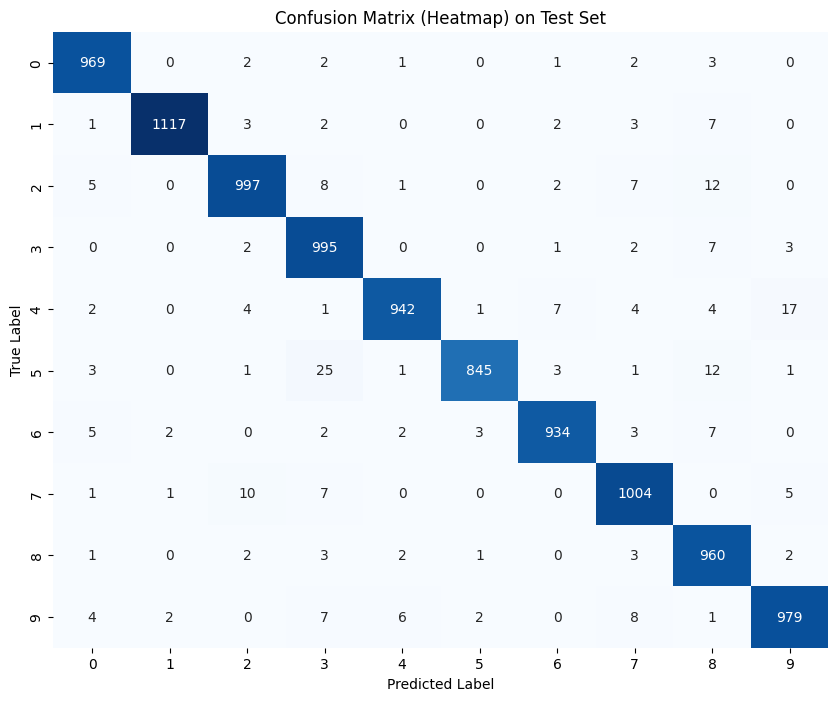

Huỳnh Thị Trúc Lam - 6351071040


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Heatmap) on Test Set')
plt.show()

print("Huỳnh Thị Trúc Lam - 6351071040")

**l) In ra kết quả phân lớp của 05 ảnh đầu tiên trong tập test**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
Displaying classification results for the first 5 images from the test set:
Huỳnh Thị Trúc Lam - 6351071040


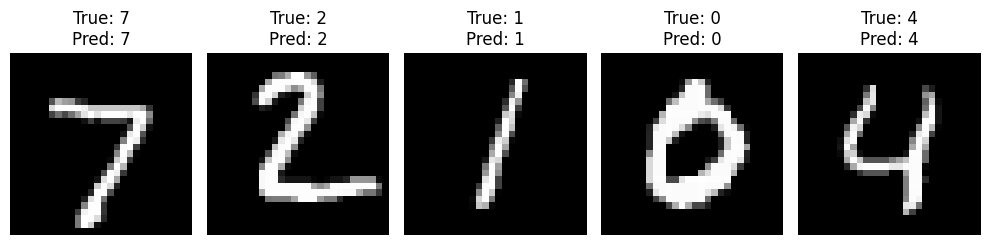

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Get predictions for the first 5 test images
num_samples = 5
x_sample = x_test[:num_samples]
y_true_sample = y_test[:num_samples]
y_pred_probabilities_sample = best_model.predict(x_sample)
y_pred_sample = np.argmax(y_pred_probabilities_sample, axis=1)

print(f"Displaying classification results for the first {num_samples} images from the test set:")
print("Huỳnh Thị Trúc Lam - 6351071040")

plt.figure(figsize=(10, 4))
for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(x_sample[i], cmap='gray')
    plt.title(f"True: {y_true_sample[i]}\nPred: {y_pred_sample[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()